In [ ]:
#######################################################################################################################
# Project: Deep Virtual Rapport Agent (data analysis)
#
#     Jan Ondras (jo951030@gmail.com)
#     Institute for Creative Technologies, University of Southern California
#     April-October 2019
#
#######################################################################################################################
# Analysis and statistics of the ccdb dataset
#######################################################################################################################

In [10]:
#######################################################################################################################
# Get histograms of head gesture durations
#######################################################################################################################

import glob     # Import glob to easily loop over files
import pympi    # Import pympi to work with elan files
from collections import defaultdict

hgs = defaultdict(list)

tier_names = {
    'nod': 'Head Nodding', 
    'shake': 'Head Sideways Shake', 
    'tilt': 'Head Tilt (left/right)'
}

sessid_to_annotators = defaultdict(list)

cnt_files = 0

# One with 30FPS, second part 60 FPS
for file_path in glob.glob('./../../datasets/ccdb/sessions/*/*/*.eaf') + glob.glob('./../../datasets/ccdb/sessions/*/*.eaf'):
    
    cnt_files += 1
    print(file_path)
    file_path_split = file_path.split('/')
    sessid = file_path_split[-2]
    
    # For the extended dataset, aggregate info about annotators
    file_path_split_ann = file_path_split[-1].split('-')
    if len(file_path_split_ann) > 1:
        annotator = file_path_split_ann[-2]
        conversant = file_path_split_ann[-1].split('.')[0]
        print(f"\t {annotator}-{conversant}")
        sessid_to_annotators[sessid].append(f'{annotator}-{conversant}')
    
    eafob = pympi.Elan.Eaf(file_path)
    
    for k,v in tier_names.items():
        
        anns = eafob.get_annotation_data_for_tier(v)
        
        for ann in anns:
            hgs[k].append((ann[1] - ann[0])/1000)
        
        print(k, anns)
    print()

print(f'Processed {cnt_files} files')
print()
for sessid, annotators in sessid_to_annotators.items():
    print(sessid, annotators)

./../../datasets/ccdb/sessions/P6_P4_1602/P6_P4_1602_C1/P6_P4_1602_C1.eaf
nod [(38379, 39204, ''), (83523, 84447, ''), (118833, 119790, ''), (129822, 131373, ''), (162459, 163614, ''), (274197, 275946, '')]
shake [(22968, 24156, ''), (33825, 35079, ''), (52932, 53691, ''), (100320, 100848, ''), (104544, 105204, ''), (122826, 123123, '')]
tilt [(74481, 75042, '')]

./../../datasets/ccdb/sessions/P6_P4_1602/P6_P4_1602_C2/P6_P4_1602_C2.eaf
nod [(35838, 36795, ''), (148896, 150117, ''), (286704, 287529, ''), (289311, 289773, ''), (290037, 292380, ''), (293271, 294063, '')]
shake [(175791, 176748, ''), (183513, 186120, ''), (187539, 190212, ''), (220341, 222255, ''), (224763, 227568, ''), (228657, 229614, '')]
tilt [(138666, 139491, ''), (269445, 270402, ''), (270963, 273735, ''), (274857, 276507, '')]

./../../datasets/ccdb/sessions/P6_P3_1602/P6_P3_1602_C2/P6_P3_1602_C2.eaf
nod [(9438, 10230, ''), (16533, 18117, ''), (21648, 22473, ''), (28215, 29370, ''), (47982, 49467, ''), (115995, 116

nod [(10352, 10970, ''), (11411, 12735, ''), (16558, 16559, ''), (16559, 18088, ''), (27702, 28324, ''), (50133, 51599, ''), (67616, 68645, '')]
shake [(4433, 5100, ''), (42099, 44066, ''), (69099, 71666, '')]
tilt []

./../../datasets/ccdb/sessions/P20-P22-part1/P20-P22-part1-A3-C1.eaf
	 A3-C1
nod []
shake []
tilt []

./../../datasets/ccdb/sessions/P20-P22-part1/P20-P22-part1-A2-C2.eaf
	 A2-C2
nod []
shake [(15632, 16768, ''), (18416, 18672, ''), (21728, 23152, ''), (28768, 30192, ''), (45344, 46000, ''), (59152, 59504, '')]
tilt []

./../../datasets/ccdb/sessions/P20-P22-part1/P20-P22-part1-A2-C1.eaf
	 A2-C1
nod [(36433, 37100, ''), (54683, 55100, '')]
shake [(44150, 44500, ''), (52900, 53266, '')]
tilt []

./../../datasets/ccdb/sessions/P20-P22-part1/P20-P22-part1-A3-C2.eaf
	 A3-C2
nod []
shake [(14705, 17176, ''), (17176, 18794, ''), (23323, 24764, ''), (45042, 46483, '')]
tilt []

./../../datasets/ccdb/sessions/P22-P21-part2/P22-P21-part2-A2-C2.eaf
	 A2-C2
nod []
shake [(24565, 26

Mean: 1.4108986928104577	 Median: 1.155
Min: 0.001	 Max: 6.567


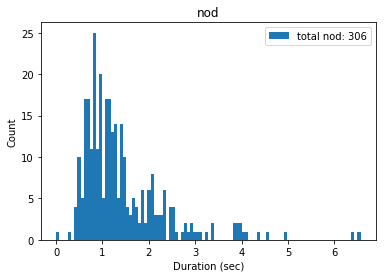

Mean: 1.2450523560209426	 Median: 1.122
Min: 0.256	 Max: 3.663


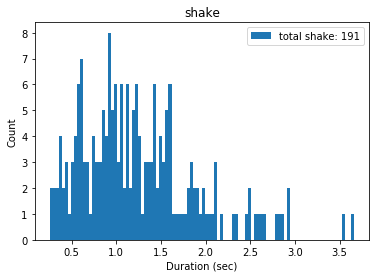

Mean: 0.9384216867469879	 Median: 0.824
Min: 0.231	 Max: 2.937


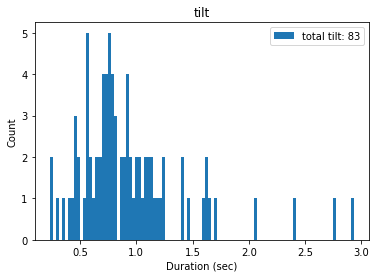

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# FPS_1 = 30
# FPS_2 = 60

bins_range = 100

for k in hgs.keys():
    print(f'Mean: {np.mean(hgs[k])}\t Median: {np.median(hgs[k])}')
    print(f'Min: {np.min(hgs[k])}\t Max: {np.max(hgs[k])}')
    # Save all durations for overall stats
    np.savez(f'./gesture_durations/{k}_ccdb', durations=hgs[k])
    plt.figure()
    plt.title(k)
    plt.hist(hgs[k], bins=bins_range, label=f'total {k}: {len(hgs[k])}')
    plt.xlabel('Duration (sec)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [4]:
for k in hgs.keys():
    print(f"total duration of {k}: {np.sum(hgs[k])} seconds")

total duration of nod: 431.735 seconds
total duration of shake: 237.805 seconds
total duration of tilt: 77.889 seconds
